# Introduction
This model helps to predict the old car price according to thier condition.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preparing data 
### Reading data

In [4]:
car_data=pd.read_csv("datasets/latest.csv",encoding='ANSI')
car_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7083353880,https://hattiesburg.craigslist.org/cto/d/mosel...,hattiesburg,https://hattiesburg.craigslist.org,20000,2018.0,nissan,kicks sv,like new,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00c0c_eCyVB4kIgs...,"2018 Nissan Kicks SV for sale. Asking $20,000 ...",NaN,ms,31.4836,-89.3206
1,7092291959,https://amarillo.craigslist.org/ctd/d/amarillo...,amarillo,https://amarillo.craigslist.org,22995,2014.0,ford,f150,like new,6 cylinders,...,4wd,full-size,pickup,white,https://images.craigslist.org/00y0y_gimprJKpew...,COME AND CHECK OUT THIS 2014 FORD F-150 WITH: ...,NaN,tx,35.1831,-101.8840
2,7079776839,https://annarbor.craigslist.org/ctd/d/kalamazo...,ann arbor,https://annarbor.craigslist.org,500,2004.0,mazda,rx8,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00x0x_gh8MdK8QDs...,"Kalamazoo Online Auction - Wednesday, February...",NaN,mi,42.2736,-85.5457
3,7079776211,https://annarbor.craigslist.org/ctd/d/chesanin...,ann arbor,https://annarbor.craigslist.org,6995,2011.0,gmc,acadia,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00R0R_j2SH54tMqk...,WE HAVE OVER 500 VEHICLES IN STOCK! See our ...,NaN,mi,43.1824,-84.1122
4,7083335576,https://hattiesburg.craigslist.org/ctd/d/look-...,hattiesburg,https://hattiesburg.craigslist.org,0,2010.0,ford,f150,excellent,8 cylinders,...,rwd,NaN,truck,NaN,https://images.craigslist.org/00y0y_10KewVDUxW...,985-626-1948 or 504-453-7844 Look at our webs...,NaN,ms,30.3220,-89.9297


In [5]:
car_data.describe()

,id,price,year,odometer,county,lat,long
count,1.504400e+04,1.504400e+04,15025.000000,1.204800e+04,0.0,14884.000000,14884.000000
mean,7.087122e+09,9.480599e+04,2009.586423,1.025477e+05,NaN,38.078654,-93.995271
std,5.555802e+06,1.006536e+07,8.926663,7.909139e+04,NaN,5.193206,13.140880
min,7.074429e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-41.920700,-124.498000
25%,7.084286e+09,4.500000e+03,2007.000000,5.189600e+04,NaN,34.867275,-104.955000
50%,7.088505e+09,9.500000e+03,2011.000000,9.724000e+04,NaN,39.578800,-95.825100
75%,7.091552e+09,1.799000e+04,2015.000000,1.400000e+05,NaN,41.585175,-82.989500
max,7.093530e+09,1.234568e+09,2020.000000,2.727000e+06,NaN,48.937200,-1.976170


# Dropping some useless column

In [32]:
car_data.drop(['url','id','region_url','image_url','county','state','lat','long','odometer','vin'],axis='columns',inplace=True)


In [33]:
car_data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,description
0,greensboro,10299.0,2012.0,acura,tl,NaN,NaN,gas,clean,automatic,NaN,NaN,other,blue,2012 Acura TL Base 4dr Sedan Offered by: B...
1,greensboro,0.0,2011.0,bmw,335,NaN,6 cylinders,gas,clean,automatic,rwd,NaN,convertible,blue,BMW 3 Series 335i Convertible Navigation Dakot...
2,greensboro,9500.0,2011.0,jaguar,xf,excellent,NaN,gas,clean,automatic,NaN,NaN,NaN,blue,2011 jaguar XF premium - estate sale. Retired ...
3,greensboro,3995.0,2004.0,honda,element,NaN,NaN,gas,clean,automatic,fwd,NaN,SUV,orange,2004 Honda Element LX 4dr SUV Offered by: ...
4,lincoln,41988.0,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,"Shop Indoors, Heated Showroom!!!www.gretnaauto..."


# Removing duplicates

In [34]:
car_data.columns


Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'description'],
      dtype='object')

In [35]:
car_data_dup=car_data.drop_duplicates(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'description'])

In [36]:
car_data_dup.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,description
0,greensboro,10299.0,2012.0,acura,tl,NaN,NaN,gas,clean,automatic,NaN,NaN,other,blue,2012 Acura TL Base 4dr Sedan Offered by: B...
1,greensboro,0.0,2011.0,bmw,335,NaN,6 cylinders,gas,clean,automatic,rwd,NaN,convertible,blue,BMW 3 Series 335i Convertible Navigation Dakot...
2,greensboro,9500.0,2011.0,jaguar,xf,excellent,NaN,gas,clean,automatic,NaN,NaN,NaN,blue,2011 jaguar XF premium - estate sale. Retired ...
3,greensboro,3995.0,2004.0,honda,element,NaN,NaN,gas,clean,automatic,fwd,NaN,SUV,orange,2004 Honda Element LX 4dr SUV Offered by: ...
4,lincoln,41988.0,2016.0,chevrolet,silverado k2500hd,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,"Shop Indoors, Heated Showroom!!!www.gretnaauto..."


# Remove the Outliners

In [37]:
car_data_dup = car_data_dup[
        (car_data_dup.year <= 2020) 
      & (car_data_dup.year>= 1950) 
      & (car_data_dup.price >= 100) 
      & (car_data_dup.price <= 150000) ]


In [48]:
car_data_dup.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,description
0,greensboro,10299.0,2012.0,acura,tl,not-cleared,4 cylinders,gas,clean,automatic,not-cleared,not-cleared,other,blue,2012 Acura TL Base 4dr Sedan Offered by: B...
2,greensboro,9500.0,2011.0,jaguar,xf,excellent,4 cylinders,gas,clean,automatic,not-cleared,not-cleared,not-cleared,blue,2011 jaguar XF premium - estate sale. Retired ...
3,greensboro,3995.0,2004.0,honda,element,not-cleared,4 cylinders,gas,clean,automatic,fwd,not-cleared,SUV,orange,2004 Honda Element LX 4dr SUV Offered by: ...
4,lincoln,41988.0,2016.0,chevrolet,silverado k2500hd,not-cleared,4 cylinders,gas,clean,automatic,not-cleared,not-cleared,not-cleared,not-cleared,"Shop Indoors, Heated Showroom!!!www.gretnaauto..."
5,greensboro,12995.0,2015.0,kia,sportage,not-cleared,4 cylinders,gas,clean,automatic,4wd,not-cleared,wagon,not-cleared,2015 Kia Sportage EX AWD 4dr SUV Offered b...


# Handling null values

In [45]:
car_data_dup.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
dtype: int64

In [46]:
car_data_dup['manufacturer'].fillna(value='not-cleared',inplace=True)
car_data_dup['model'].fillna(value='not-cleared',inplace=True)
car_data_dup['condition'].fillna(value='not-cleared',inplace=True)
car_data_dup['cylinders'].fillna(value='4 cylinders',inplace=True)
car_data_dup['fuel'].fillna(value='petrol',inplace=True)
car_data_dup['title_status'].fillna(value='not-cleared',inplace=True)
car_data_dup['transmission'].fillna(value='not-cleared',inplace=True)
car_data_dup['drive'].fillna(value='not-cleared',inplace=True)
car_data_dup['size'].fillna(value='not-cleared',inplace=True)
car_data_dup['type'].fillna(value='not-cleared',inplace=True)
car_data_dup['paint_color'].fillna(value='not-cleared',inplace=True)
car_data_dup['description'].fillna(value='not-cleared',inplace=True)

In [47]:
car_data_dup.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
dtype: int64

# visulization

model
f-150             6440
silverado 1500    4099
not-cleared       4087
1500              3674
silverado         3249
Name: model, dtype: int64


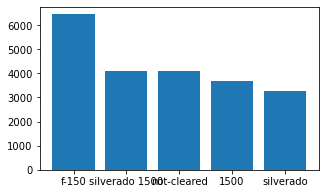

manufacturer
ford         55139
chevrolet    45365
toyota       22759
nissan       15600
honda        14682
Name: manufacturer, dtype: int64


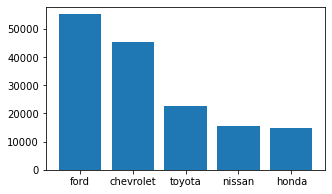

type
not-cleared    81180
sedan          53595
SUV            52737
pickup         32312
truck          27626
Name: type, dtype: int64


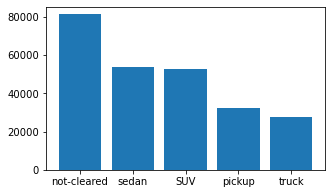

fuel
gas       262910
diesel     24900
other       8500
hybrid      2378
petrol      1654
Name: fuel, dtype: int64


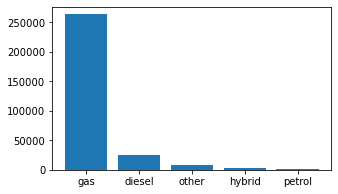

year
2017.0    21955
2016.0    21256
2015.0    21036
2013.0    20934
2014.0    20211
Name: year, dtype: int64


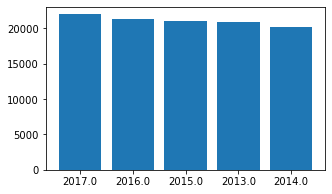

region
columbus                 2784
tri-cities               2774
minneapolis / st paul    2766
portland                 2743
tampa bay area           2739
Name: region, dtype: int64


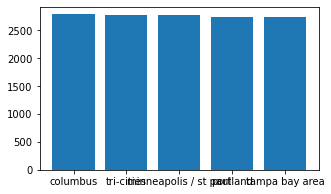

cylinders
4 cylinders     173650
6 cylinders      66223
8 cylinders      57257
5 cylinders       1655
10 cylinders      1044
Name: cylinders, dtype: int64


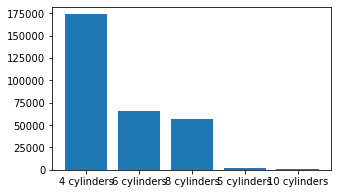

size
not-cleared    205437
full-size       52696
mid-size        26605
compact         13901
sub-compact      2245
Name: size, dtype: int64


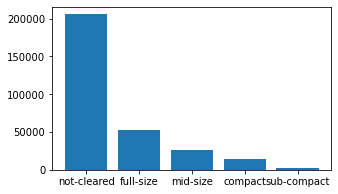

In [52]:
categories = [ 'model', 'manufacturer', 'type', 'fuel','year','region','cylinders','size']

for i, c in enumerate(categories):
    v = car_data_dup[c].unique()
    
    g = car_data_dup.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, g.index)
    plt.show()